In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [25]:
print(f"Columns: {df_train.shape[1]} and Rows: {df_train.shape[0]}")
print("Column names and data types:")
df_train.dtypes

Columns: 19 and Rows: 140700
Column names and data types:


Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [10]:
print(f"Number of duplicates: {df_train.duplicated().sum()}")

Number of duplicates: 0


In [11]:
print("Number of missing values in each column:")
print(df_train.isnull().sum())


Number of missing values in each column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0

<Axes: title={'center': 'Heatmap of missing values'}>

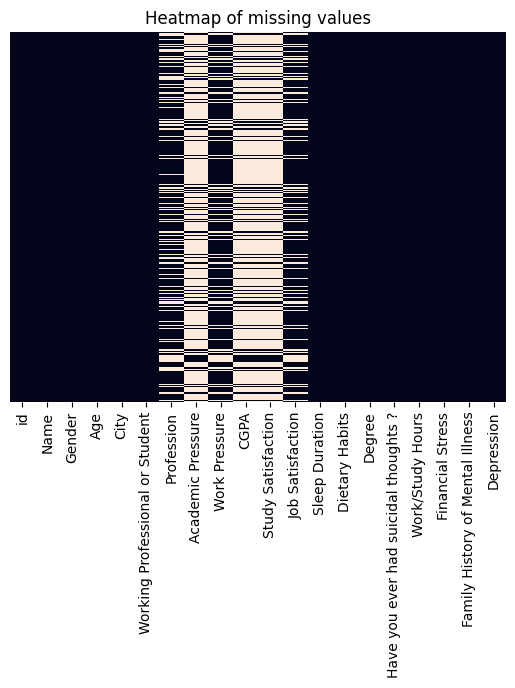

In [12]:
plt.figure()
plt.title("Heatmap of missing values")
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False)


In [22]:
if 'id' in df_train:
    df_train = df_train.drop(columns='id')
target = 'Depression'

category_columns = df_train.select_dtypes(include=['object']).columns
number_collumns = df_train.select_dtypes(exclude=['object']).columns.drop(target)

print("Target Column:", target)
print("\nCategorical Columns:", category_columns.tolist())
print("\nNumerical Columns:", number_collumns.tolist())

Target Column: Depression

Categorical Columns: ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

Numerical Columns: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [23]:
for column in category_columns:
    num_unique = df_train[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'Name' has 422 unique categories.
'Gender' has 2 unique categories.
'City' has 98 unique categories.
'Working Professional or Student' has 2 unique categories.
'Profession' has 64 unique categories.
'Sleep Duration' has 36 unique categories.
'Dietary Habits' has 23 unique categories.
'Degree' has 115 unique categories.
'Have you ever had suicidal thoughts ?' has 2 unique categories.
'Family History of Mental Illness' has 2 unique categories.


In [24]:
# Top 10 values of each category columns
for column in category_columns:
    print(f"\nTop value counts in '{column}':\n{df_train[column].value_counts().head(10)}")


Top value counts in 'Name':
Name
Rohan          3178
Aarav          2336
Rupak          2176
Aaradhya       2045
Anvi           2035
Raghavendra    1877
Vani           1657
Tushar         1596
Ritvik         1589
Shiv           1568
Name: count, dtype: int64

Top value counts in 'Gender':
Gender
Male      77464
Female    63236
Name: count, dtype: int64

Top value counts in 'City':
City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Name: count, dtype: int64

Top value counts in 'Working Professional or Student':
Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

Top value counts in 'Profession':
Profession
Teacher             24906
Content Writer       7814
Architect            4370
Consultant           4229
HR Manager           4022
Pharmacist  